In [1]:
# Loading libraries
%matplotlib inline
import os
import os.path
from netCDF4 import Dataset
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc 
import fnmatch
from cycler import cycler
import pandas as pd
from pandas import read_csv, to_datetime, DataFrame
import datetime
import time
import matplotlib.dates as mdates

from matplotlib.path import Path
from matplotlib.patches import PathPatch
from mpl_toolkits.basemap import Basemap # Basemap pour les cartes

In [2]:
# LOADING GRID FILE AND VARIABLES
!pwd
grid_file = '../DATA/grille.nc' 
print 'file exist:', os.path.isfile(grid_file)

f = Dataset(grid_file) # open netcdf
# extracting variables
lon_t = f.variables['longitude_t'][:] # extracting lon data
lat_t = f.variables['latitude_t'][:] # extracting lat data
depth_t = f.variables['depth_t'][:]
bathy = f.variables['h_w'][:]
print 'Bathy :', np.shape(bathy), 'max :', np.max(bathy), 'min :', np.min(bathy)

f.close()

new_bath = np.ma.masked_where(bathy<200, bathy)

/home/dosa/MON_ENV_PYTHON/IAV
file exist: True
Bathy : (160, 394) max : 5054.49 min : 20.5226


In [5]:
sim_list = ["Rt1.5_W120_Z0.9"]
file_path = "./CHL_SURF_COMPAR/"

for sim in sim_list:
    list_ann_files = []

    for temp_file in os.listdir(file_path+sim+'_ANNMEANS/'):
        if (fnmatch.fnmatch(temp_file, 'moyenne*chl_tot.nc')):
            list_ann_files.append(temp_file)
        
#list_ann_files

In [14]:
sim_list = ["Rt1.5_W120_Z0.9", "BAREBW", "test_DEPAude_OLDPAR_ANNMEANS"]
file_path = "./CHL_SURF_COMPAR/"

for sim in sim_list:
    list_ann_files = []

    for temp_file in os.listdir(file_path+sim+'_ANNMEANS/'):
        if (fnmatch.fnmatch(temp_file, 'AllYears*chl_tot.nc')):
            list_ann_files.append(temp_file)
            
    f = Dataset(file_path+sim+'_ANNMEANS/'+list_ann_files[0]) # open netcdf
    # extracting variables
    chl_tot = f.variables['chl_tot'][:] # extracting lon data
    f.close()

In [15]:
np.shape(chl_tot)

(1, 43, 160, 394)

END of CELL


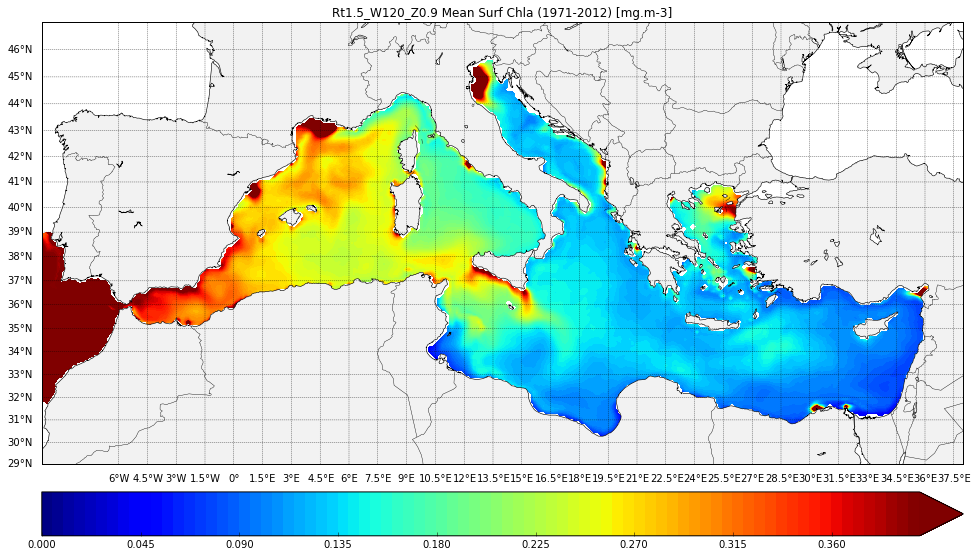

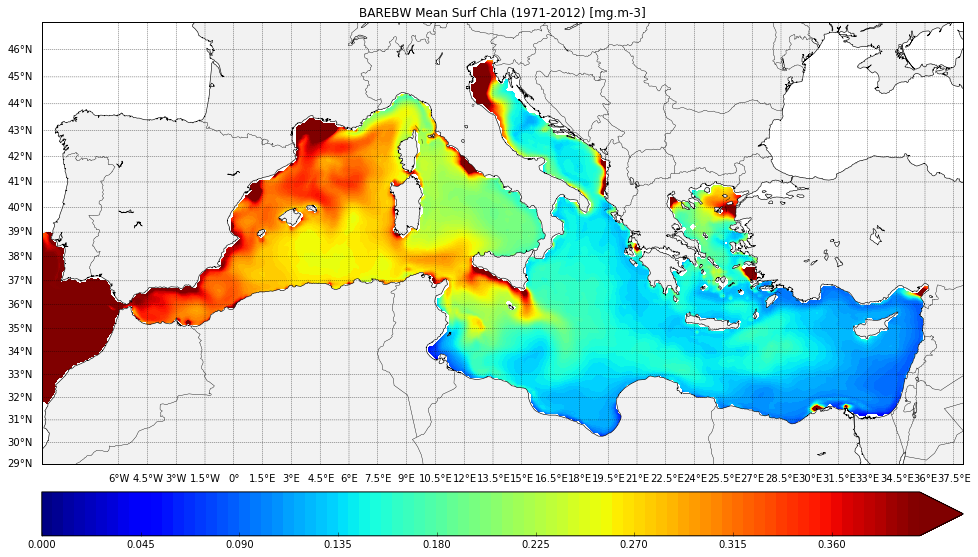

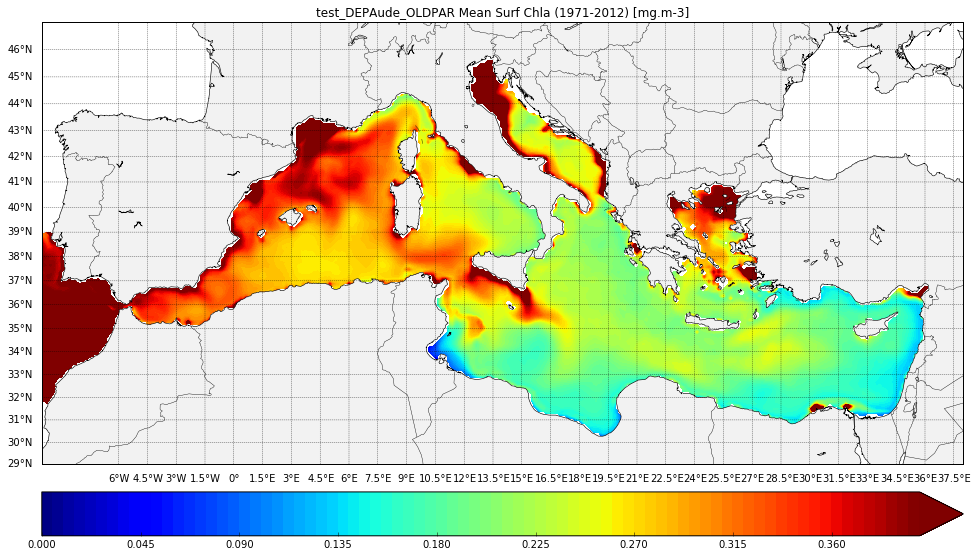

In [31]:
sim_list = ["Rt1.5_W120_Z0.9", "BAREBW", "test_DEPAude_OLDPAR"]
file_path = "./CHL_SURF_COMPAR/"

for sim in sim_list:
    list_ann_files = []

    for temp_file in os.listdir(file_path+sim+'_ANNMEANS/'):
        if (fnmatch.fnmatch(temp_file, 'AllYears*chl_tot.nc')):
            list_ann_files.append(temp_file)
            
    f = Dataset(file_path+sim+'_ANNMEANS/'+list_ann_files[0]) # open netcdf
    # extracting variables
    chl_tot = f.variables['chl_tot'][0,42,:,:] # extracting lon data
    f.close()
    
    # Map
    x1,x2,y1,y2 = -10, 38, 29, 47;
    m = Basemap(resolution='i',projection='merc', llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,lat_ts=(x1+x2)/2);
    # figure
    fig = plt.figure(figsize=(16,16));
    ax = fig.add_axes([0.1,0.1,0.8,0.8]);
    m.drawcountries(linewidth=0.4);
    m.drawcoastlines(linewidth=0.6);
    m.fillcontinents(color='0.95',lake_color='white');
    parallels = np.arange(0.,81,1);
    m.drawparallels(parallels,labels=[True,False,True,False],linewidth=0.4);
    meridians = np.arange(-6.,351.,1.5);
    m.drawmeridians(meridians,labels=[True,False,False,True],linewidth=0.4);

    # Creating corresponding variable names
    #data_to_plot = np.ma.masked_where(bathy<200,chl_tot)
    #data_to_plot = np.ma.masked_where(lon_t<-5.5,data_to_plot)
    data_to_plot = chl_tot


    # doing a map # Données
    xd,yd = m(lon_t,lat_t);
    levels = np.arange(0,0.401,0.005);
    levels_bathy = [200] ;
    #CS_bathy = m.contour(xd,yd,bathy,levels=levels_bathy,linewidths=2.5,colors='k');
    cs = m.contourf(xd,yd,data_to_plot,levels=levels,cmap=plt.cm.jet,extend='max');# binary / jet ,levels=levels
    plt.colorbar(cs, orientation='horizontal', pad = 0.03)
    plt.title(sim+' Mean Surf Chla (1971-2012) [mg.m-3]')
    plt.savefig('/home/dosa/THESE/CR_reunions/JULY_FIGS/IAV_CORR_MAPS/AllYearsMean_'+sim+'.png',bbox_inches='tight',format='png')

print 'END of CELL'

END of CELL


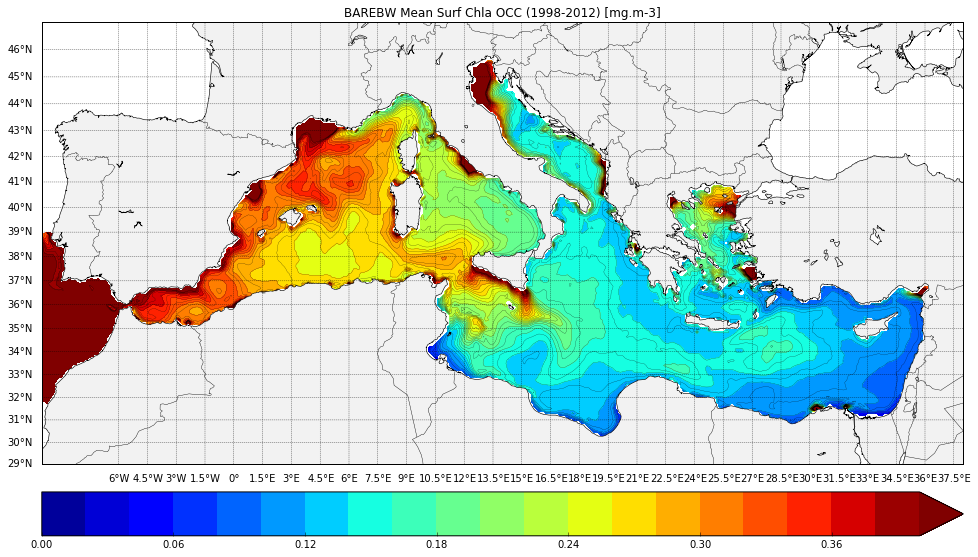

In [38]:
## Mean OCC period (full years = 1998-2012)

sim_list = ["BAREBW"]
file_path = "./CHL_SURF_COMPAR/"

for sim in sim_list:
    list_ann_files = []

    for temp_file in os.listdir(file_path+sim+'_ANNMEANS/OC_period/'):
        if (fnmatch.fnmatch(temp_file, 'AllYears*chl_tot.nc')):
            list_ann_files.append(temp_file)
            
    f = Dataset(file_path+sim+'_ANNMEANS/'+list_ann_files[0]) # open netcdf
    # extracting variables
    chl_tot = f.variables['chl_tot'][0,42,:,:] # extracting lon data
    f.close()
    
    # Map
    x1,x2,y1,y2 = -10, 38, 29, 47;
    m = Basemap(resolution='i',projection='merc', llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,lat_ts=(x1+x2)/2);
    # figure
    fig = plt.figure(figsize=(16,16));
    ax = fig.add_axes([0.1,0.1,0.8,0.8]);
    m.drawcountries(linewidth=0.4);
    m.drawcoastlines(linewidth=0.6);
    m.fillcontinents(color='0.95',lake_color='white');
    parallels = np.arange(0.,81,1);
    m.drawparallels(parallels,labels=[True,False,True,False],linewidth=0.4);
    meridians = np.arange(-6.,351.,1.5);
    m.drawmeridians(meridians,labels=[True,False,False,True],linewidth=0.4);

    # Creating corresponding variable names
    #data_to_plot = np.ma.masked_where(bathy<200,chl_tot)
    #data_to_plot = np.ma.masked_where(lon_t<-5.5,data_to_plot)
    data_to_plot = chl_tot


    # doing a map # Données
    xd,yd = m(lon_t,lat_t);
    levels = np.arange(0,0.401,0.02);
    levels2 = np.arange(0,0.401,0.01);
    levels_bathy = [200] ;
    #CS_bathy = m.contour(xd,yd,bathy,levels=levels_bathy,linewidths=2.5,colors='k');
    cs = m.contourf(xd,yd,data_to_plot,levels=levels,cmap=plt.cm.jet,extend='max');# binary / jet ,levels=levels
    CS = m.contour(xd,yd,data_to_plot,levels=levels2,linewidths=0.2,colors='k');
    plt.colorbar(cs, orientation='horizontal', pad = 0.03)
    plt.title(sim+' Mean Surf Chla OCC (1998-2012) [mg.m-3]')
    #plt.savefig('/home/dosa/THESE/CR_reunions/JULY_FIGS/IAV_CORR_MAPS/AllYearsMean_'+sim+'_OCC.png',bbox_inches='tight',format='png')

print 'END of CELL'

END of CELL


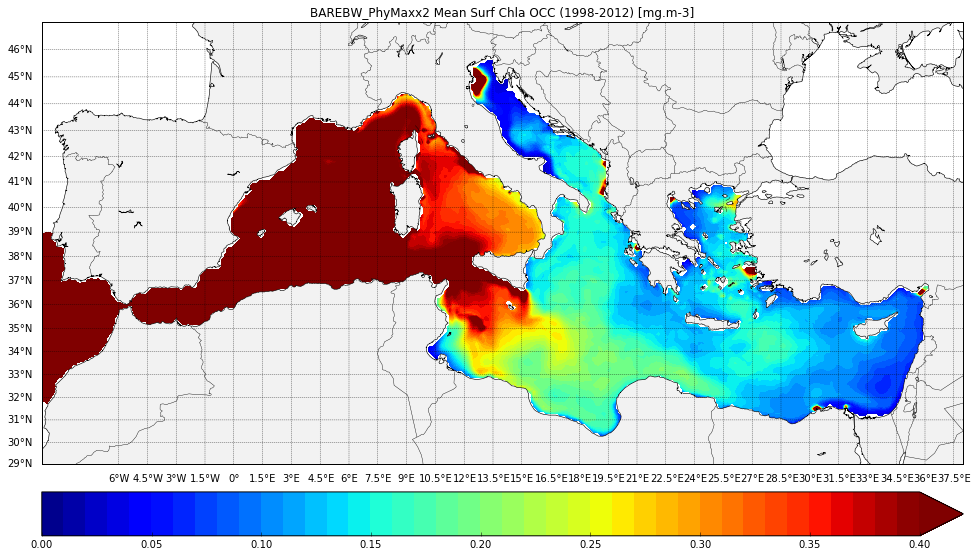

In [84]:
##30/07 
sim_list = ["BAREBW_PhyMaxx2"]
file_path = "./CHL_SURF_COMPAR/"

for sim in sim_list:
    list_ann_files = []

    for temp_file in os.listdir(file_path+sim+'/OC_period/'):
        if (fnmatch.fnmatch(temp_file, 'AllYears*chl_tot.nc')):
            list_ann_files.append(temp_file)
            
    f = Dataset(file_path+sim+'/OCC_period/'+list_ann_files[0]) # open netcdf
    # extracting variables
    chl_tot = f.variables['chl_tot'][0,42,:,:] # extracting lon data
    f.close()
    
    # Map
    x1,x2,y1,y2 = -10, 38, 29, 47;
    m = Basemap(resolution='i',projection='merc', llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,lat_ts=(x1+x2)/2);
    # figure
    fig = plt.figure(figsize=(16,16));
    ax = fig.add_axes([0.1,0.1,0.8,0.8]);
    m.drawcountries(linewidth=0.4);
    m.drawcoastlines(linewidth=0.6);
    m.fillcontinents(color='0.95',lake_color='white');
    parallels = np.arange(0.,81,1);
    m.drawparallels(parallels,labels=[True,False,True,False],linewidth=0.4);
    meridians = np.arange(-6.,351.,1.5);
    m.drawmeridians(meridians,labels=[True,False,False,True],linewidth=0.4);

    # Creating corresponding variable names
    #data_to_plot = np.ma.masked_where(bathy<200,chl_tot)
    #data_to_plot = np.ma.masked_where(lon_t<-5.5,data_to_plot)
    data_to_plot = chl_tot


    # doing a map # Données
    xd,yd = m(lon_t,lat_t);
    levels = np.arange(0,0.402,0.01);
    levels2 = np.arange(0,0.401,0.01);
    levels_bathy = [200] ;
    #CS_bathy = m.contour(xd,yd,bathy,levels=levels_bathy,linewidths=2.5,colors='k');
    cs = m.contourf(xd,yd,data_to_plot,levels=levels,cmap=plt.cm.jet,extend='max');# binary / jet ,levels=levels
    #CS = m.contour(xd,yd,data_to_plot,levels=levels2,linewidths=0.2,colors='k');
    plt.colorbar(cs, orientation='horizontal', pad = 0.03)
    plt.title(sim+' Mean Surf Chla OCC (1998-2012) [mg.m-3]')
    #plt.savefig('/home/dosa/THESE/CR_reunions/JULY_FIGS/IAV_CORR_MAPS/AllYearsMean_'+sim+'_OCC.png',bbox_inches='tight',format='png')

print 'END of CELL'

In [81]:
list_ann_files[0]

'AllYearsMean_chl_tot.nc'

In [45]:
## Mean OCC period (full years = 1998-2012)

sim_list = ["OC-CCI CNR"]
file_path_OCC = "/home/dosa/MON_ENV_PYTHON/DL_OC-CCI_CMEMS/MONTHLY/"

for sim in sim_list:
    list_ann_files = []

    for temp_file in os.listdir(file_path_OCC):
        if (fnmatch.fnmatch(temp_file, 'AllYears*chl_tot.nc')):
            list_ann_files.append(temp_file)
            
    f = Dataset(file_path_OCC+list_ann_files[0]) # open netcdf
    # extracting variables
    chl_tot = f.variables['CHL'][:] # extracting lon data
    f.close()

In [46]:
np.shape(chl_tot)

(1, 1580, 3269)

ValueError: operands could not be broadcast together with shapes (1,1580,3269) (160,394) 

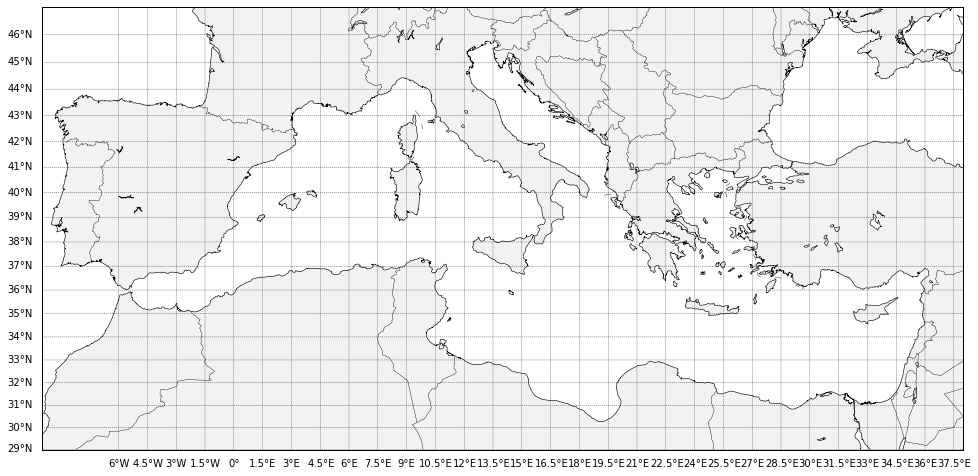

In [47]:
## Mean OCC period (full years = 1998-2012)

sim_list = ["OC-CCI CNR"]
file_path_OCC = "/home/dosa/MON_ENV_PYTHON/DL_OC-CCI_CMEMS/MONTHLY/"

for sim in sim_list:
    list_ann_files = []

    for temp_file in os.listdir(file_path_OCC):
        if (fnmatch.fnmatch(temp_file, 'AllYears*chl_tot.nc')):
            list_ann_files.append(temp_file)
            
    f = Dataset(file_path_OCC+list_ann_files[0]) # open netcdf
    # extracting variables
    chl_tot = f.variables['CHL'][:] # extracting lon data
    f.close()
    
    # Map
    x1,x2,y1,y2 = -10, 38, 29, 47;
    m = Basemap(resolution='i',projection='merc', llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,lat_ts=(x1+x2)/2);
    # figure
    fig = plt.figure(figsize=(16,16));
    ax = fig.add_axes([0.1,0.1,0.8,0.8]);
    m.drawcountries(linewidth=0.4);
    m.drawcoastlines(linewidth=0.6);
    m.fillcontinents(color='0.95',lake_color='white');
    parallels = np.arange(0.,81,1);
    m.drawparallels(parallels,labels=[True,False,True,False],linewidth=0.4);
    meridians = np.arange(-6.,351.,1.5);
    m.drawmeridians(meridians,labels=[True,False,False,True],linewidth=0.4);

    # Creating corresponding variable names
    #data_to_plot = np.ma.masked_where(bathy<200,chl_tot)
    #data_to_plot = np.ma.masked_where(lon_t<-5.5,data_to_plot)
    data_to_plot = chl_tot


    # doing a map # Données
    xd,yd = m(lon_t,lat_t);
    levels = np.arange(0,0.401,0.02);
    levels2 = np.arange(0,0.401,0.01);
    levels_bathy = [200] ;
    #CS_bathy = m.contour(xd,yd,bathy,levels=levels_bathy,linewidths=2.5,colors='k');
    cs = m.contourf(xd,yd,data_to_plot,levels=levels,cmap=plt.cm.jet,extend='max');# binary / jet ,levels=levels
    CS = m.contour(xd,yd,data_to_plot,levels=levels2,linewidths=0.2,colors='k');
    plt.colorbar(cs, orientation='horizontal', pad = 0.03)
    plt.title(sim+' Mean Surf Chla OCC (1998-2012) [mg.m-3]')
    #plt.savefig('/home/dosa/THESE/CR_reunions/JULY_FIGS/IAV_CORR_MAPS/AllYearsMean_'+sim+'_OCC.png',bbox_inches='tight',format='png')

print 'END of CELL'

In [ ]:
# Normal marche pas, pas même grille

END of CELL


/home/dosa/MON_ENV_PYTHON/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


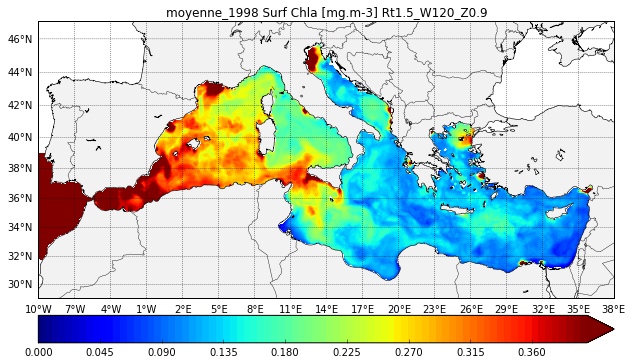

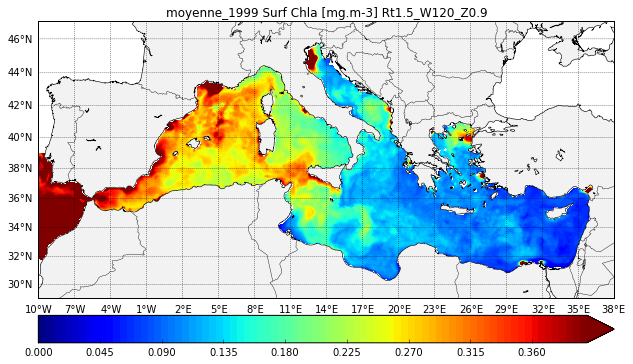

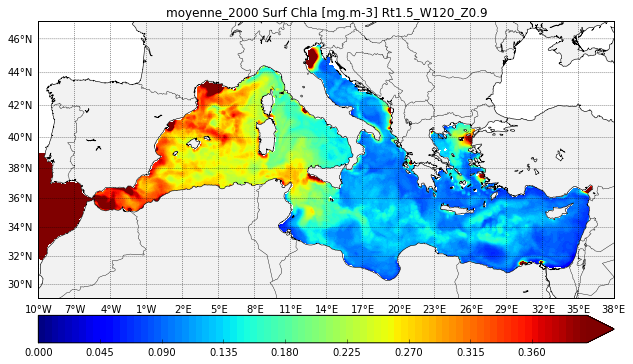

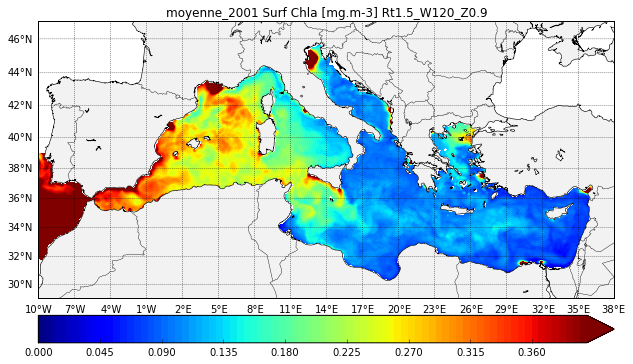

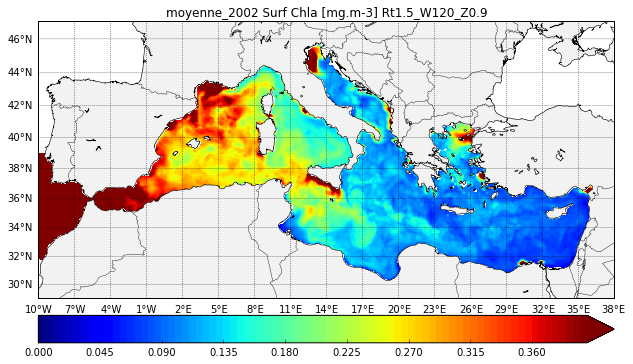

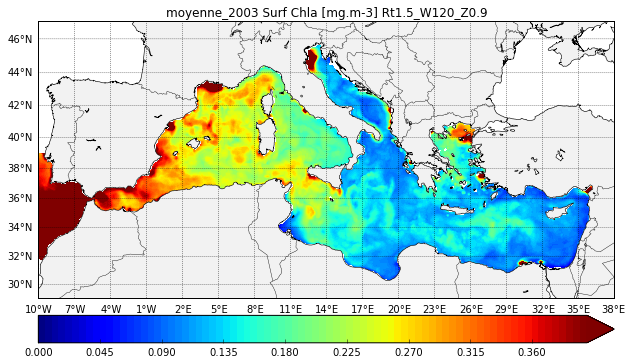

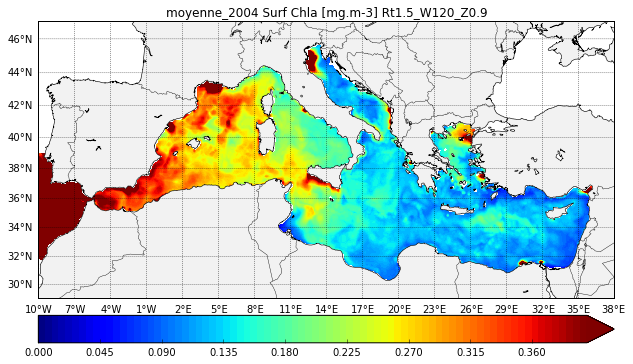

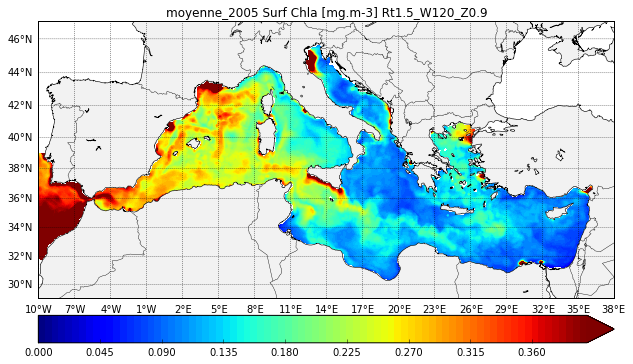

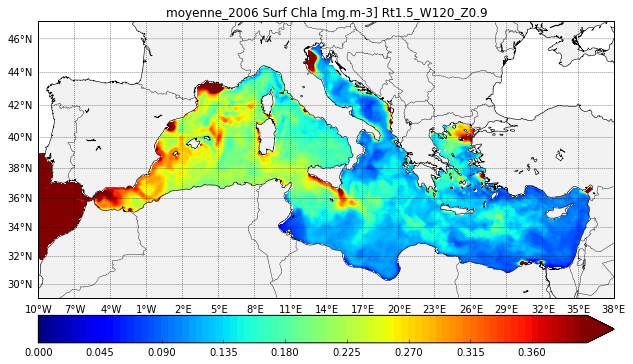

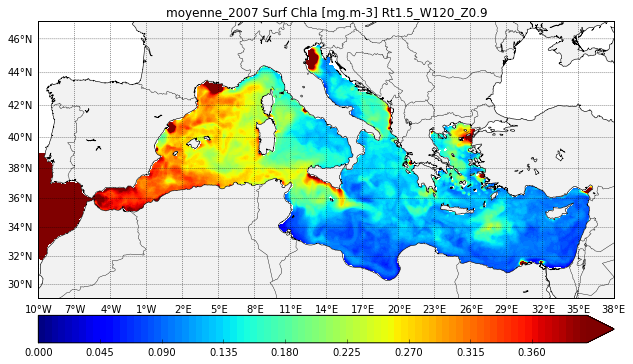

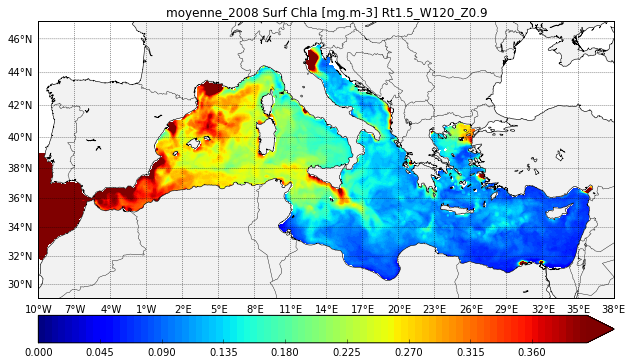

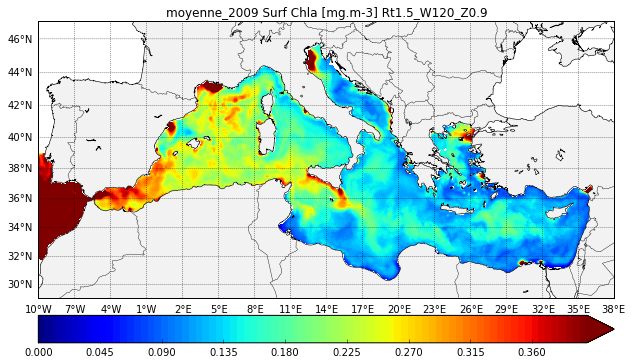

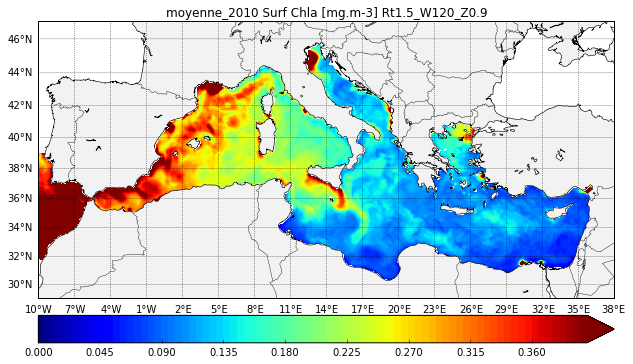

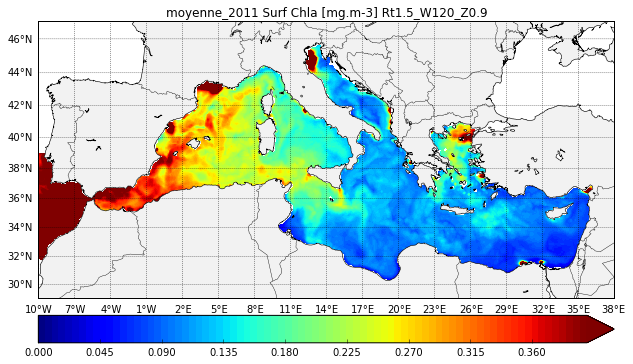

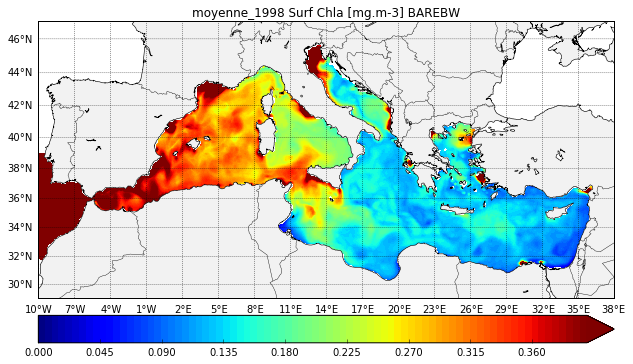

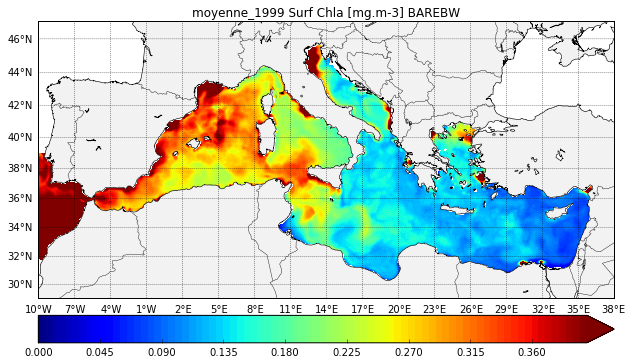

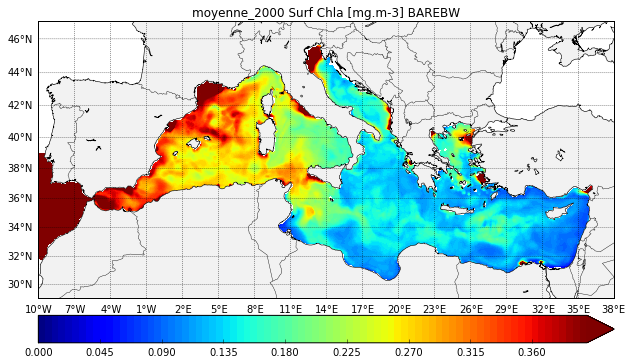

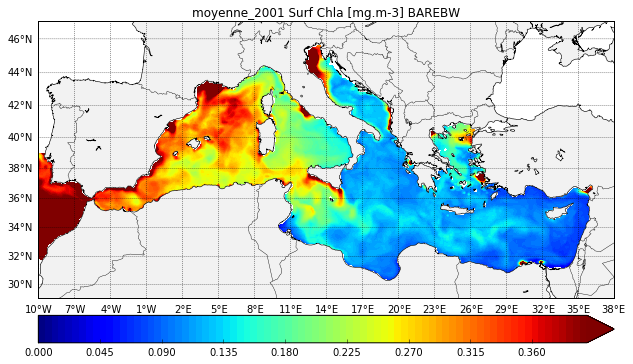

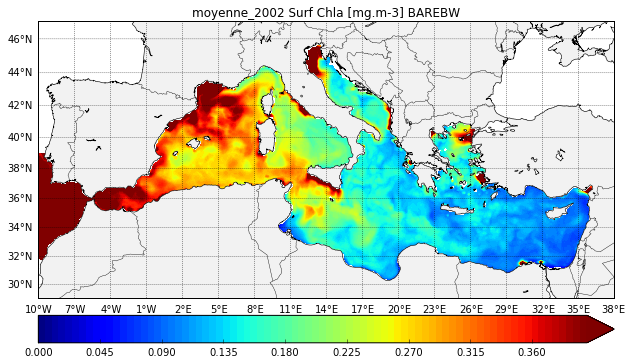

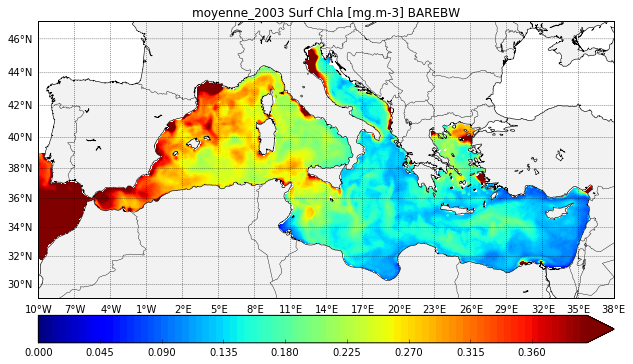

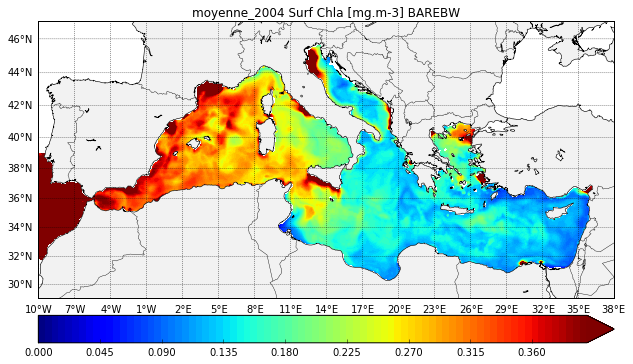

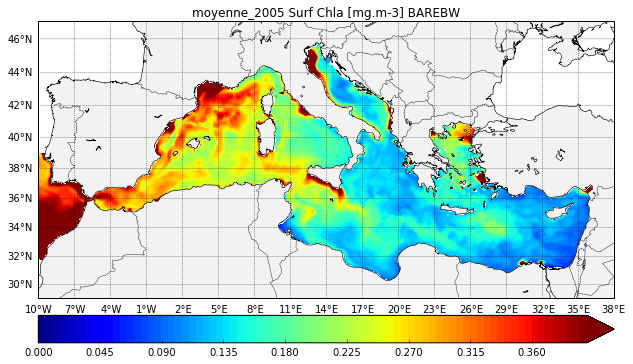

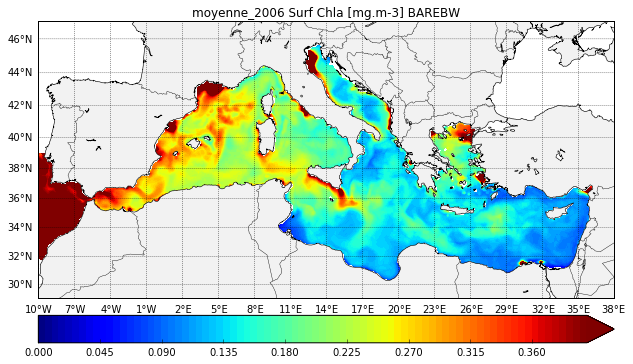

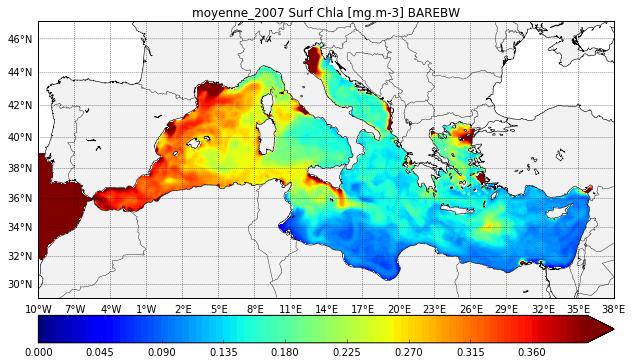

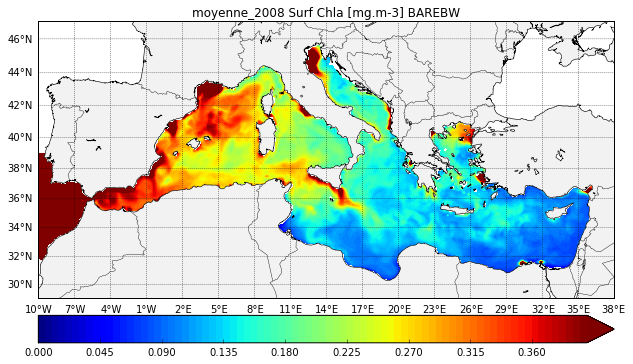

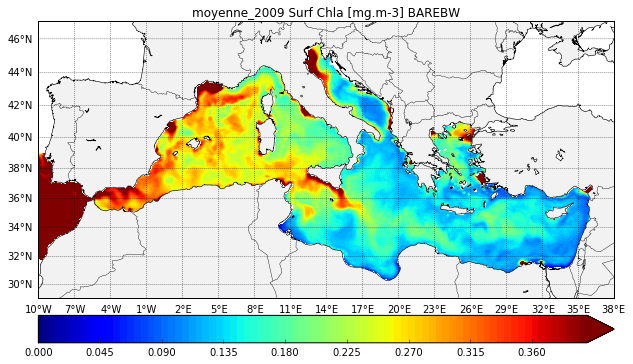

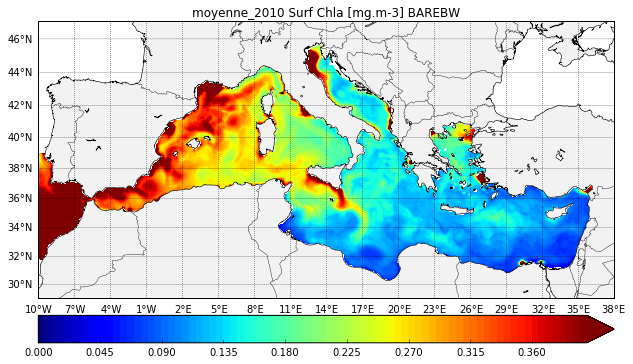

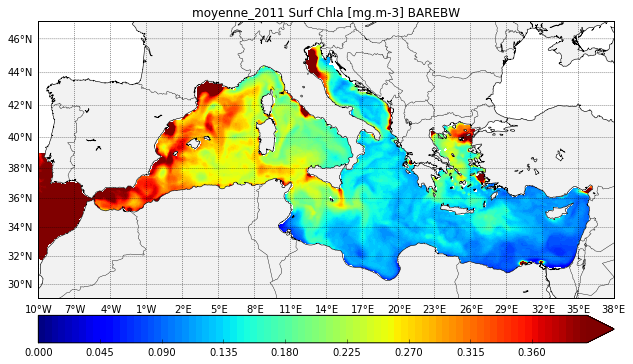

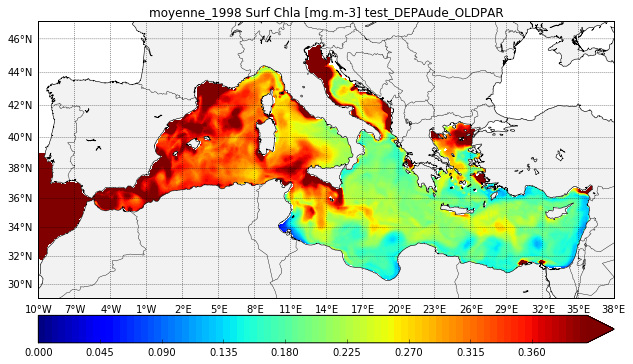

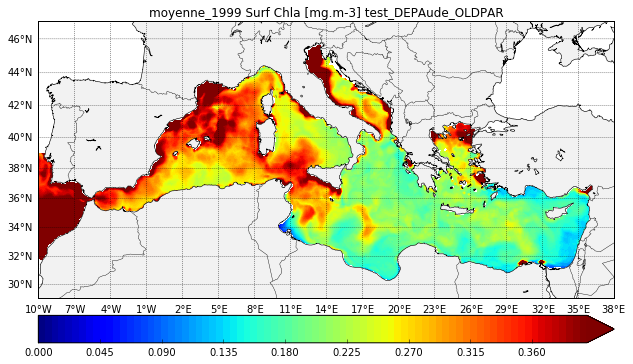

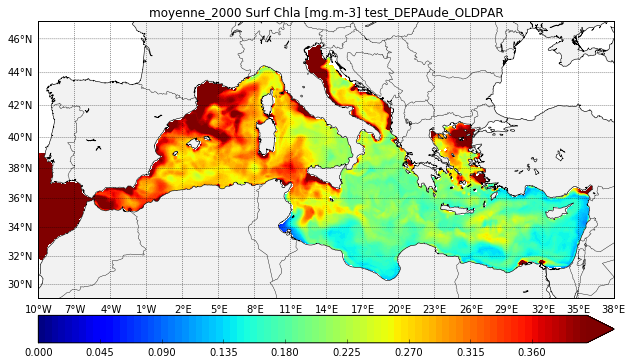

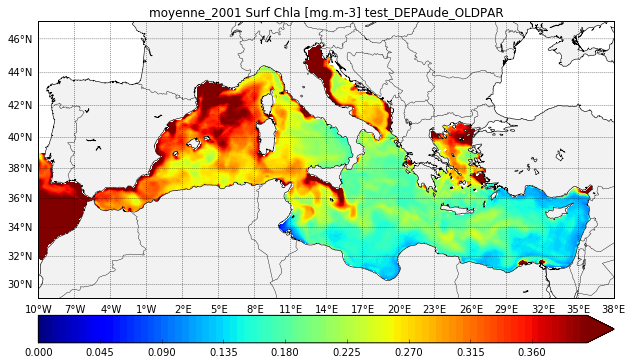

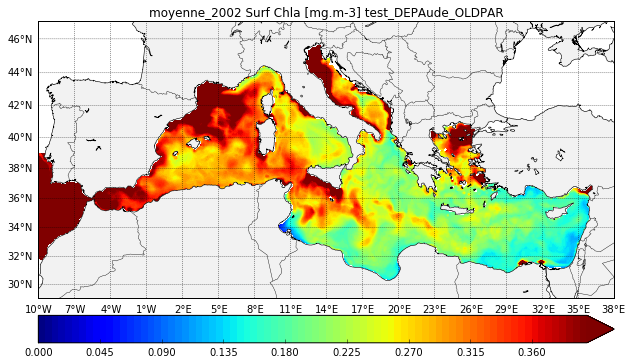

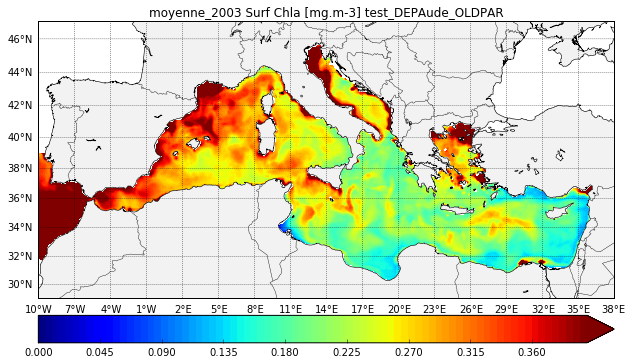

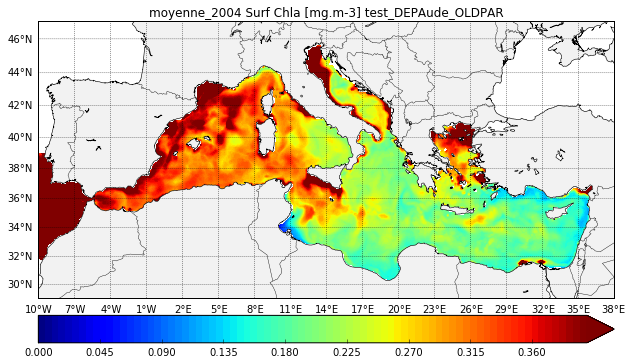

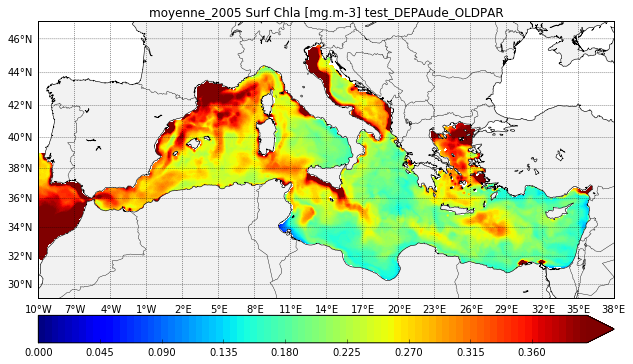

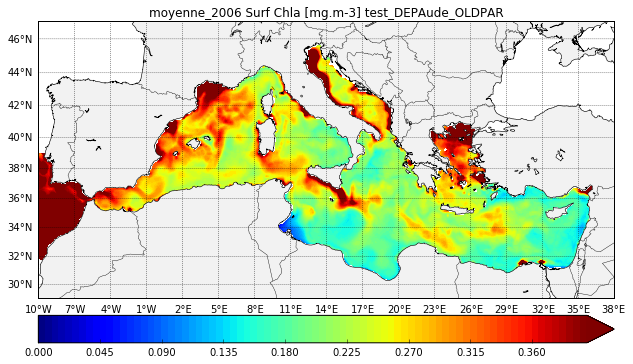

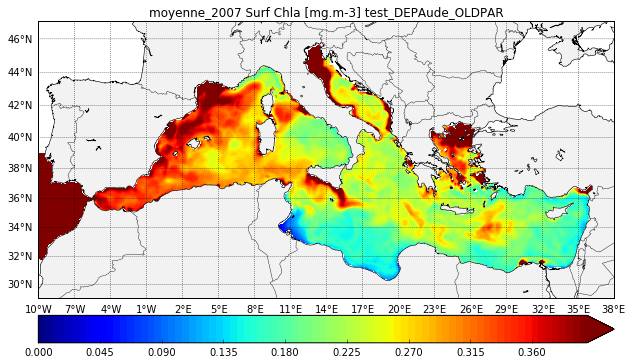

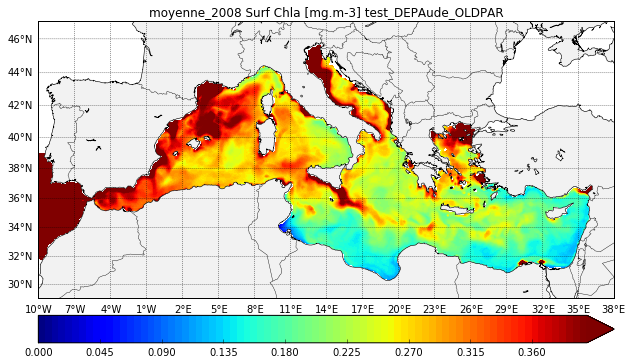

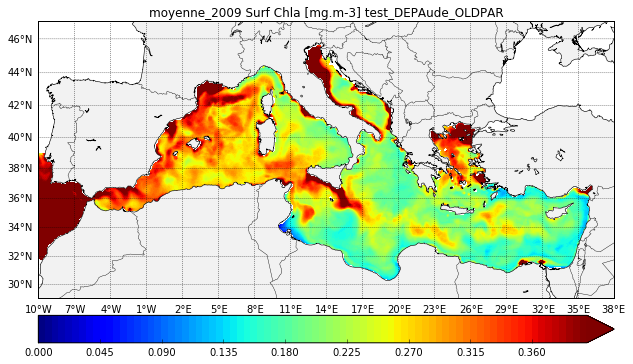

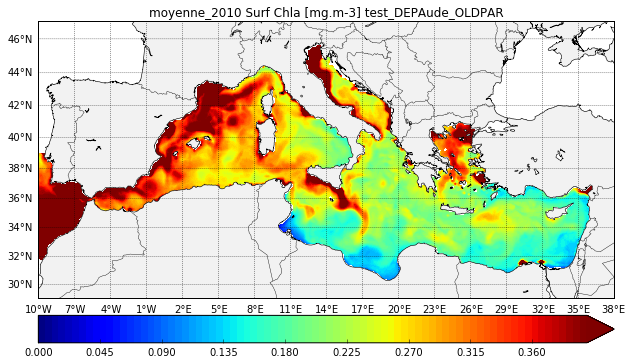

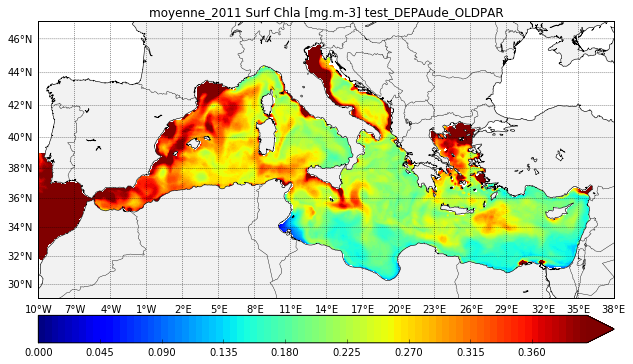

In [74]:
# Trying a loop on years

sim_list = ["Rt1.5_W120_Z0.9", "BAREBW", "test_DEPAude_OLDPAR"] #"Rt1.5_W120_Z0.9", "BAREBW", 
file_path = "./CHL_SURF_COMPAR/"
year_list = np.arange(1998,2012)

sim_row = 1
c = 1

for sim in sim_list:
    list_ann_files = []

    for year in year_list:
        for temp_file in os.listdir(file_path+sim+'_ANNMEANS/'):
            if (fnmatch.fnmatch(temp_file, 'moyenne_'+str(year)+'_chl_tot.nc')):
                list_ann_files.append(temp_file)
                
    #fig = plt.figure(1); # figsize=(16,16)
    
    for curr_file in list_ann_files:
        #print c
        f = Dataset(file_path+sim+'_ANNMEANS/'+curr_file) # open netcdf
        # extracting variables
        chl_tot = f.variables['chl_tot'][0,42,:,:] # extracting lon data
        f.close()

        # Map
        x1,x2,y1,y2 = -10, 38, 29, 47;
        m = Basemap(resolution='i',projection='merc', llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,lat_ts=(x1+x2)/2);
        # figure
        #fig = plt.figure(figsize=(16,16));
        #plt.subplot(len(list_ann_files), len(sim_list), c)
        fig = plt.figure(figsize=(10,10))
        ax = fig.add_axes([0.1,0.1,0.8,0.8]);
        m.drawcountries(linewidth=0.4);
        m.drawcoastlines(linewidth=0.6);
        m.fillcontinents(color='0.95',lake_color='white');
        parallels = np.arange(0.,81,2);
        m.drawparallels(parallels,labels=[True,False,True,False],linewidth=0.4);
        meridians = np.arange(-10.,351.,3);
        m.drawmeridians(meridians,labels=[True,False,False,True],linewidth=0.4);

        # Creating corresponding variable names
        #data_to_plot = np.ma.masked_where(bathy<200,chl_tot)
        #data_to_plot = np.ma.masked_where(lon_t<-5.5,data_to_plot)
        data_to_plot = chl_tot


        # doing a map # Données
        xd,yd = m(lon_t,lat_t);
        levels = np.arange(0,0.401,0.005);
        levels_bathy = [200] ;
        #CS_bathy = m.contour(xd,yd,bathy,levels=levels_bathy,linewidths=2.5,colors='k');
        cs = m.contourf(xd,yd,data_to_plot,levels=levels,cmap=plt.cm.jet,extend='max');# binary / jet ,levels=levels
        plt.colorbar(cs, orientation='horizontal', pad = 0.03)
        plt.title(curr_file[0:12]+' Surf Chla [mg.m-3] '+sim)
        plt.savefig('/home/dosa/THESE/CR_reunions/JULY_FIGS/IAV_CORR_MAPS/ANNUAL_MEANS_COMPARE/'+curr_file[0:12]+'_SurfChla_'+sim+'.png',bbox_inches='tight',format='png')
        # END LOOP FILEs
        c += 1
    #sim_row += 1
    # END LOOP SIMs

#plt.savefig('/home/dosa/THESE/CR_reunions/JULY_FIGS/IAV_CORR_MAPS/AllYearsMean_'+sim+'.png',bbox_inches='tight',format='png')
print 'END of CELL'